<a href="https://colab.research.google.com/github/shailesh3335/Email_Campaign_Effectiveness_Prediction_capstone/blob/main/Email_Campaign_Effectiveness_Prediction_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - **Supervised ML Classification**
##### **Contribution**    - Individual


# **Project Summary -**

The objective of this project is to develop a machine learning model capable of analyzing and monitoring emails within Gmail-based email marketing campaigns. The intended users are small to medium-sized business owners seeking to enhance the efficiency of their email marketing strategies and boost customer retention.

A primary challenge in email marketing is deciphering which emails are being read, ignored, or acknowledged by recipients. Gaining insights into the effectiveness of emails enables business owners to tailor their marketing approaches and enhance their likelihood of success.

To tackle this issue, we will collect data encompassing various email attributes, including the subject line, sender name, email content, format, frequency, target audience, and other pertinent factors. Leveraging this data, we will train a machine learning model to predict whether an email is likely to be read, ignored, or acknowledged by the recipient. The model will have the capability to analyze new emails and provide predictions on how they are expected to be received.

To assess the model's performance, we will divide our data into a training set and a testing set. The training set will be utilized to train the model, while the testing set will be used to evaluate its accuracy. Metrics such as precision, recall, and F1 score will be employed to gauge the model's effectiveness.

Upon successful training and evaluation, the model can be deployed in a production environment, offering business owners a valuable tool to enhance the effectiveness of their email marketing campaigns. By leveraging the model to characterize and monitor emails, they can make more informed decisions about targeting their marketing efforts and increasing customer retention.

In summary, this project endeavors to provide small to medium business owners with a robust solution for optimizing their email marketing campaigns. Through the application of machine learning to analyze and monitor emails, these business owners can make informed decisions and elevate the success potential of their marketing endeavors.


# **GitHub Link -**

https://github.com/shailesh3335/Email_Campaign_Effectiveness_Prediction_capstone

# **Problem Statement**


Small and medium-sized business owners are currently employing Gmail-based email marketing tactics to convert potential customers into leads. However, they face a challenge in tracking the reception of their emails—whether they are being ignored, read, or acknowledged by the recipients. Their goal is to develop a machine learning model that can assist in characterizing and monitoring these emails. The primary aim is to enhance the efficiency of their email marketing initiatives and boost customer retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [10]:
#update scikit learn for some features like roc_auc_ovr
!pip install -U scikit-learn
!pip install -U imbalanced-learn




In [11]:

!pip install shap

In [12]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math
import shap

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from imblearn import over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [13]:
# Load Dataset
df = pd.read_csv("/content/data_email_campaign.csv")

### Dataset First View

In [14]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count

# Check for duplicated rows
duplicated_rows = df.duplicated()

# Count the occurrences of True and False in the duplicated_rows Series
duplicated_counts = duplicated_rows.value_counts()

# Count the number of unique rows with duplication
num_duplicates = len(df[duplicated_rows])

# Print the result
print(f"Data is duplicated? {duplicated_counts}, unique values with {num_duplicates} duplication")


Data is duplicated? False    68353
dtype: int64, unique values with 0 duplication


#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [19]:
# Define a function called showMissing
def showMissing():
    # Find columns with missing values in the DataFrame
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Create an empty DataFrame called missingVal
missingVal = pd.DataFrame()

# Create two columns in missingVal DataFrame:
# 1. 'Missing Data Count': Count of missing values for each column in email_df
# 2. 'Missing Data Percentage': Percentage of missing values for each column in email_df
missingVal['Missing Data Count'] = df[showMissing()].isnull().sum().sort_values(ascending=False)
missingVal['Missing Data Percentage'] = df[showMissing()].isnull().sum().sort_values(ascending=False) / len(df) * 100
missingVal

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45


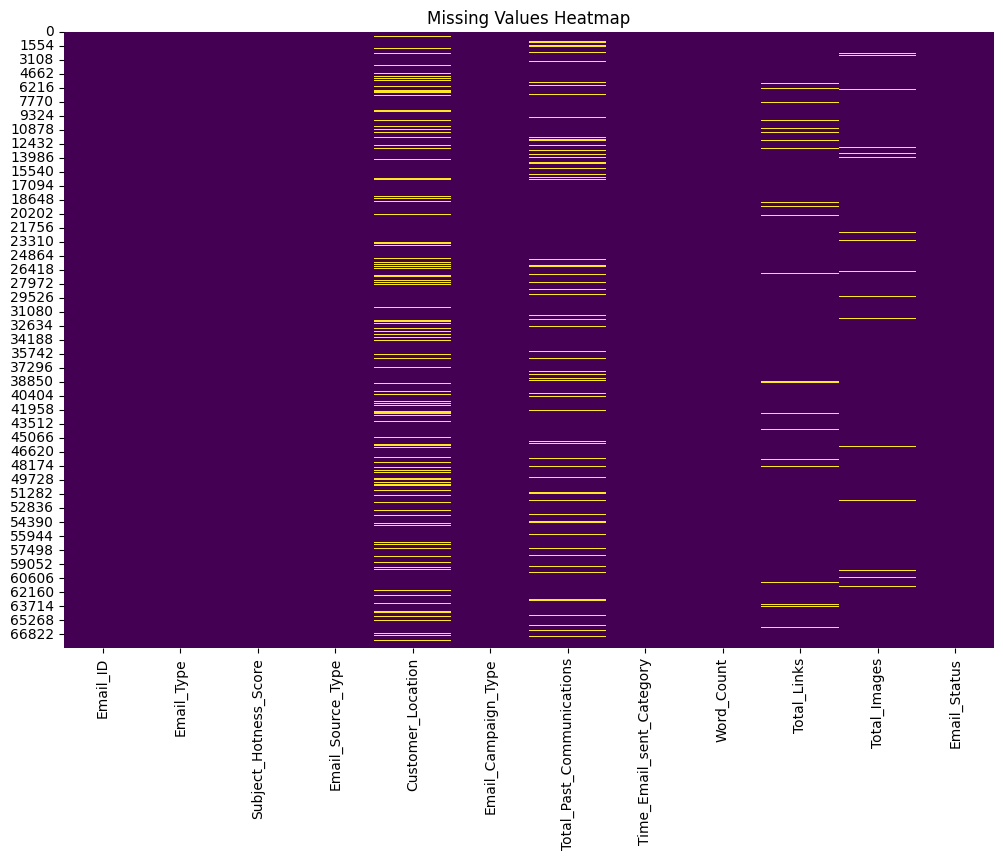

In [20]:
# Visualizing the missing values
# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize missing values in email_df
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Set the title of the plot
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()


### What did you know about your dataset?



1. The dataset consists of 68,353 observations and encompasses 12 features.

2. It is a diverse dataset, containing a combination of integer, float, and object data types.
3. Notably, the dataset is characterized by the absence of duplicate values, ensuring that the data is free from bias. Duplicates, if present, could introduce complications in downstream analyses, potentially biasing results or impeding accurate data summarization.
4. Specific features exhibit null values, with "customer location" having 11,595 instances of null values, equivalent to 16% of the dataset.
5. Features like customer location (11595 i.e., 16%), total past communication (6825 i.e., 10%), total link (2201 i.e., 3%), total images (1677 i.e., 2%) has null values.




## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [22]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.00,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,68353.00,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,68353.00,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,68353.00,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,61528.00,28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,68353.00,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,68353.00,699.93,271.72,40.00,521.00,694.00,880.00,1316.00
Total_Links,66152.00,10.43,6.38,1.00,6.00,9.00,14.00,49.00
Total_Images,66676.00,3.55,5.60,0.00,0.00,0.00,5.00,45.00
Email_Status,68353.00,0.23,0.50,0.00,0.00,0.00,0.00,2.00


### Variables Description

**Attribute Information**

---
* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
for column in df.columns.tolist():
    unique_values = df[column].nunique()
    print("Number of unique values in '{}' is {}.".format(column, unique_values))
    if unique_values < 10:  # Adjust the threshold as needed
        print("Unique Values: {}".format(df[column].unique()))
    print("-" * 40)


Number of unique values in 'Email_ID' is 68353.
----------------------------------------
Number of unique values in 'Email_Type' is 2.
Unique Values: [1 2]
----------------------------------------
Number of unique values in 'Subject_Hotness_Score' is 51.
----------------------------------------
Number of unique values in 'Email_Source_Type' is 2.
Unique Values: [2 1]
----------------------------------------
Number of unique values in 'Customer_Location' is 7.
Unique Values: ['E' nan 'B' 'C' 'G' 'D' 'F' 'A']
----------------------------------------
Number of unique values in 'Email_Campaign_Type' is 3.
Unique Values: [2 3 1]
----------------------------------------
Number of unique values in 'Total_Past_Communications' is 64.
----------------------------------------
Number of unique values in 'Time_Email_sent_Category' is 3.
Unique Values: [1 2 3]
----------------------------------------
Number of unique values in 'Word_Count' is 151.
----------------------------------------
Number of u

## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
# Checking Shape of Email Read
print("Number of Email Read : -",len(df[df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("Number of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("Numberof Email Ignored : -",len(df[df['Email_Status'] == 0]))

Number of Email Read : - 11039
Number of Email Acknowledged : - 2373
Numberof Email Ignored : - 54941


In [25]:
# Email Status groupby Email_Type
result_df = df.groupby(['Email_Type', 'Email_Status']).size().reset_index(name="Count")
print(result_df)


   Email_Type  Email_Status  Count
0           1             0  39004
1           1             1   8208
2           1             2   1654
3           2             0  15937
4           2             1   2831
5           2             2    719


In [26]:
# Email Status groupby Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [27]:
# Email Status groupby Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [28]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [29]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [30]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [31]:
#creating variable to store categorial features
cat_feature = [feature for feature in df.columns.to_list() if feature not in num_feature]
cat_feature

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [32]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [33]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [34]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [35]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [36]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [37]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,1154.00,0.49,0.20
Total_Past_Communications,79818.00,37.60,40.00
Total_Links,24037.00,10.47,9.00
Total_Images,8547.00,3.69,0.00
Word_Count,1472720.00,620.62,610.00


In [38]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,10018.10,0.91,0.30
Total_Past_Communications,345204.00,34.71,36.00
Total_Links,105294.00,9.85,9.00
Total_Images,34296.00,3.19,0.00
Word_Count,6523382.00,590.94,578.00


In [39]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,63707.30,1.16,1.00
Total_Past_Communications,1355183.00,27.40,26.00
Total_Links,560603.00,10.54,9.00
Total_Images,193902.00,3.62,0.00
Word_Count,39846333.00,725.26,713.00


In [40]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [41]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [42]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [43]:
# Calculate engagement rate based on emails acknowledged by the readers (Email_Status == 2)
engagement_count = df[df['Email_Status'] == 2]['Email_Status'].count()
total_emails = len(df)
engagement_rate = (engagement_count / total_emails) * 100

# Print the result with a comment
print(f"Engagement Rate: {engagement_rate:.2f}% (Emails Acknowledged by Readers)")

# Calculate open rate based on emails read and acknowledged by the readers (Email_Status != 0)
open_count = df[df['Email_Status'] != 0]['Email_Status'].count()
open_rate = (open_count / total_emails) * 100

# Print the result with a comment
print(f"Open Rate: {open_rate:.2f}% (Emails Read and Acknowledged by Readers)")

# Calculate ignored rate based on emails read and acknowledged by the readers (Email_Status == 0)
ignored_count = df[df['Email_Status'] == 0]['Email_Status'].count()
ignored_rate = (ignored_count / total_emails) * 100

# Print the result with a comment
print(f"Ignored Rate: {ignored_rate:.2f}% (Emails Read but Ignored by Readers)")


Engagement Rate: 3.47% (Emails Acknowledged by Readers)
Open Rate: 19.62% (Emails Read and Acknowledged by Readers)
Ignored Rate: 80.38% (Emails Read but Ignored by Readers)


In [44]:
# Function to calculate engagement rate
def Engagement(group):
    acknowledged_emails = group[group['Email_Status'] == 2]
    return len(acknowledged_emails) / len(group)

# Function to calculate open rate
def Open(group):
    opened_emails = group[group['Email_Status'] != 0]
    return len(opened_emails) / len(group)

# Function to calculate ignore rate
def Ignore(group):
    ignored_emails = group[group['Email_Status'] == 0]
    return (len(ignored_emails) / len(group))

# List of categorical features to analyze
cat_feature = ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']

# Calculating engagement, open, and ignored rate for each categorical feature
for cat in cat_feature:
    # Skip Email_Status and Email_ID
    if (cat == 'Email_Status') or (cat == 'Email_ID'):
        continue

    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')

    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')

    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('=' * 120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64

In [45]:
# Link-to-Word ratio
df['Link_to_Word_ratio'] = df['Total_Links'] / df['Word_Count']

# Image-to-Word ratio
df['Image_to_Word_ratio'] = df['Total_Images'] / df['Word_Count']

# Image-Link-Word ratio
df['Image_Link_Word_ratio'] = (df['Total_Images'] + df['Total_Links']) / df['Word_Count']

# Percentage of words that are links
df['Percentage_of_words_that_are_links'] = (df['Total_Links'] / df['Word_Count']) * 100

# Number of Images per link
df['Number_of_Images_per_link'] = df['Total_Images'] / df['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df['Hotness_Score'] = df['Subject_Hotness_Score'] * df['Total_Past_Communications']

# Calculate and print the mean of each variable
print("Mean of Link_to_Word_ratio:", df['Link_to_Word_ratio'].mean())
print("Mean of Image_to_Word_ratio:", df['Image_to_Word_ratio'].mean())
print("Mean of Image_Link_Word_ratio:", df['Image_Link_Word_ratio'].mean())
print("Mean of Percentage_of_words_that_are_links:", df['Percentage_of_words_that_are_links'].mean())
print("Mean of Number_of_Images_per_link:", df['Number_of_Images_per_link'].mean())
print("Mean of Hotness_Score:", df['Hotness_Score'].mean())


Mean of Link_to_Word_ratio: 0.019561519413416703
Mean of Image_to_Word_ratio: 0.006425172246013729
Mean of Image_Link_Word_ratio: 0.025960293907245944
Mean of Percentage_of_words_that_are_links: 1.9561519413416701
Mean of Number_of_Images_per_link: 0.24534715873562615
Mean of Hotness_Score: 26.159572877389156


### What all manipulations have you done and insights you found?

To comprehend the effectiveness of email campaigns, I initiated the analysis by scrutinizing the percentage of emails exhibiting customer engagement, along with bounce or ignore rates.


*   The number of emails read amounted to 11,039, constituting 17% of the total.
*   Emails acknowledged numbered 2,373, representing 3% of the total.

*   A substantial 54,941 emails, equivalent to 80%, were ignored.

This outcome underscores that the majority of emails faced disregard. To discern the reasons behind this indifference, I conducted a comprehensive analysis by grouping categorical features to uncover potential relationships. The entire analysis was contextualized by the email status to precisely ascertain engagement.

I further assessed the rates at which emails were opened, ignored, or acknowledged for each categorical variable. Additionally, I computed link and image density concerning the total word count. By utilizing this information, I determined the percentage of links and images in relation to the word count. Finally, I combined the subject hotness score and total past communication to calculate a weighted sum.

The analysis reveals that, to garner email acknowledgment, an average of at least 37 total communications is necessary, surpassing the interaction level observed in ignored emails. Other features, such as word count, indicate that an average of 590-600 words are acknowledged, ideally containing no more than 10 links and 3 images.

Notably, emails of Type 1 with Source 2, Location C, and Campaign Type 1, when sent in the morning, demonstrated effective engagement, boasting a higher count of acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Continous Variables - Distplot

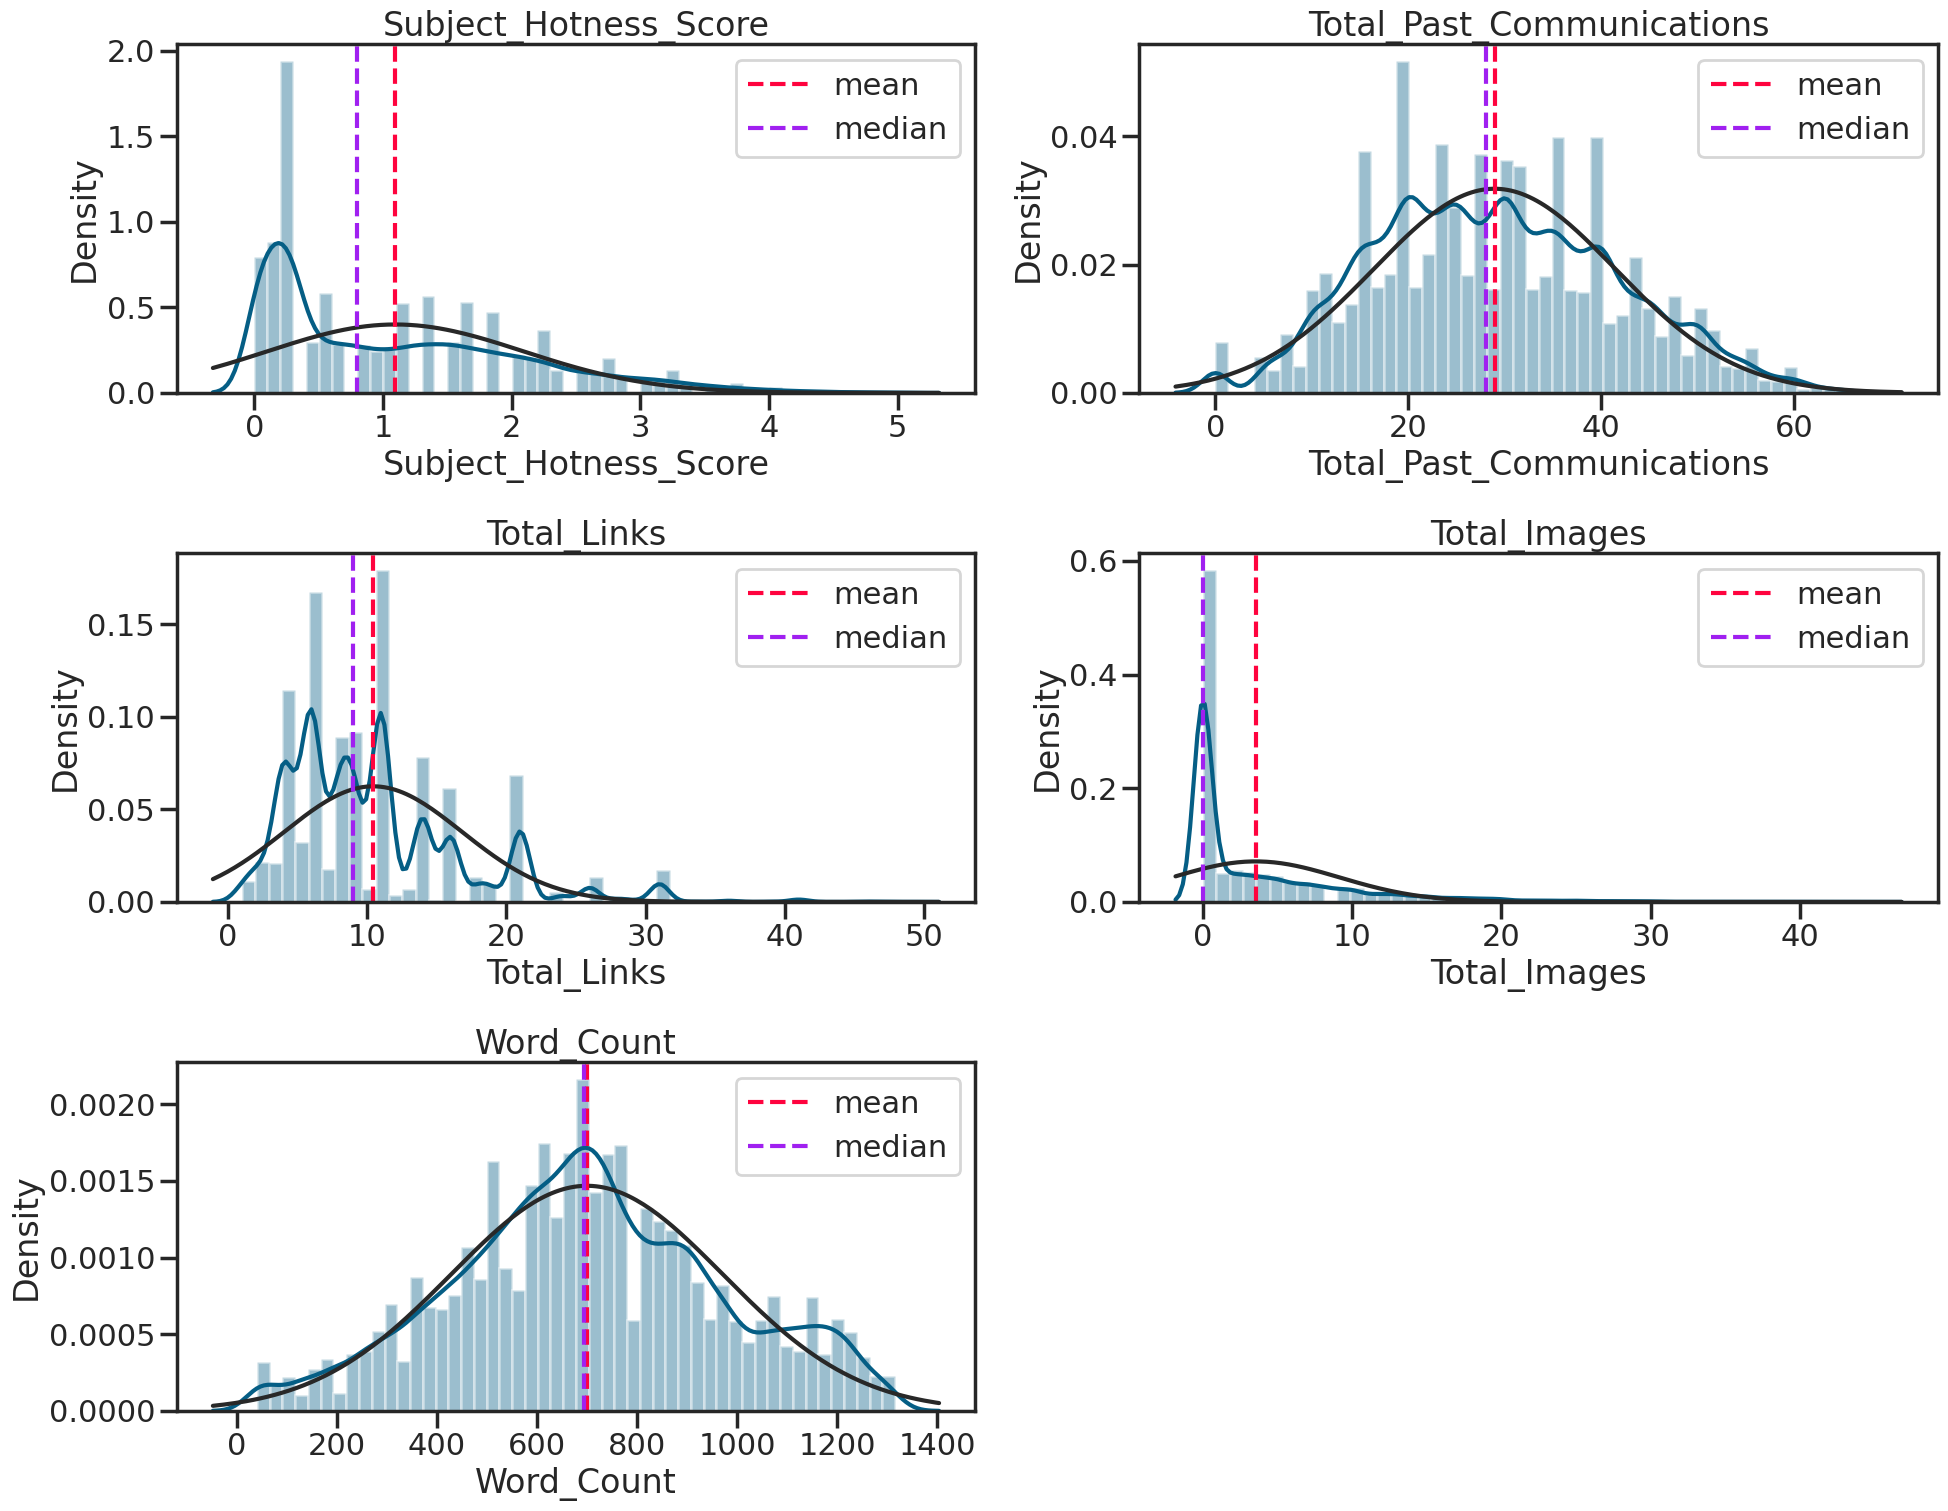

In [46]:
# Chart - 1 visualization code
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (20,30))
for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

Distplot drawn above is a combination of both histogram and KDE plot, it is best for plotting continous variable and understanding the distribution.

##### 2. What is/are the insight(s) found from the chart?

Subject hotness score, total image and total links are positively skewed whereas wordcount and total comunication count show somewhat normal distribution.

* Subject hotness score has an average of value 1
* Total communication has an average of value 30
* Toal links has an average value of 10
* Total image has an average value of 3
* Word count has an average value of 700


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot was drawn to understand distribution of each variable which eventually will help in building model and treating with null values or outliers, however it helps how each values plays important role in creating an effective email campaign.

Standalone this plot is not sufficient to predict negative growth.

#### Chart - 2 Enagement Based on Email Type

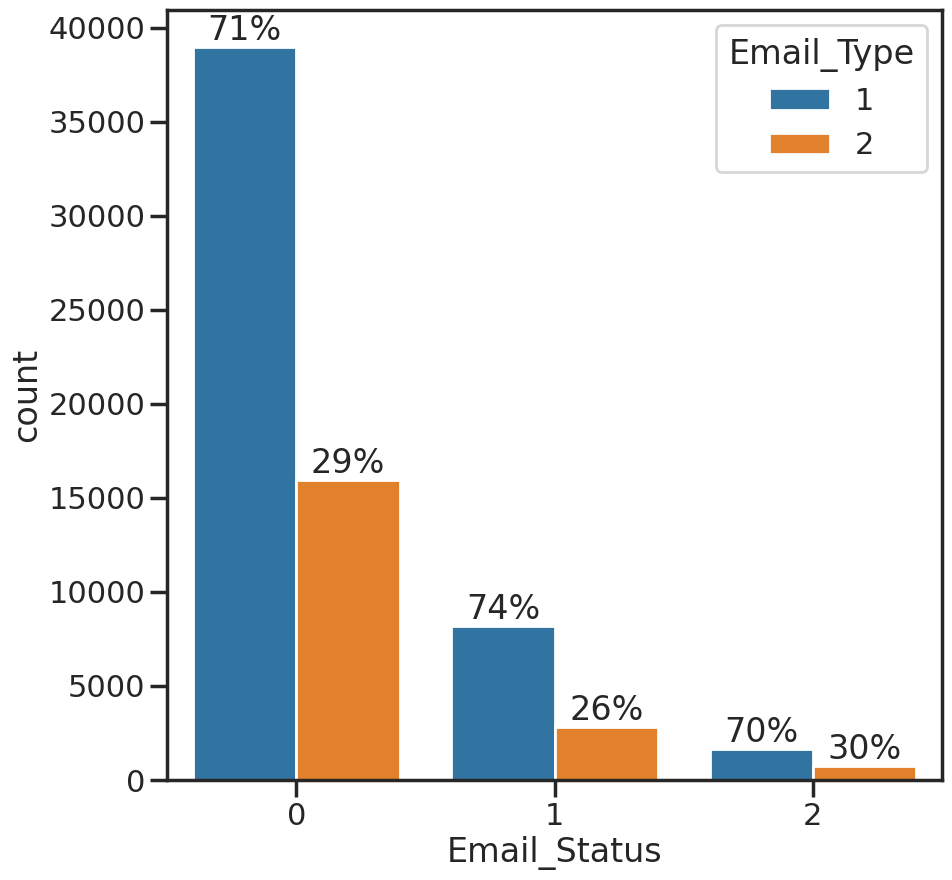

In [47]:
# Chart - 2 visualization code
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

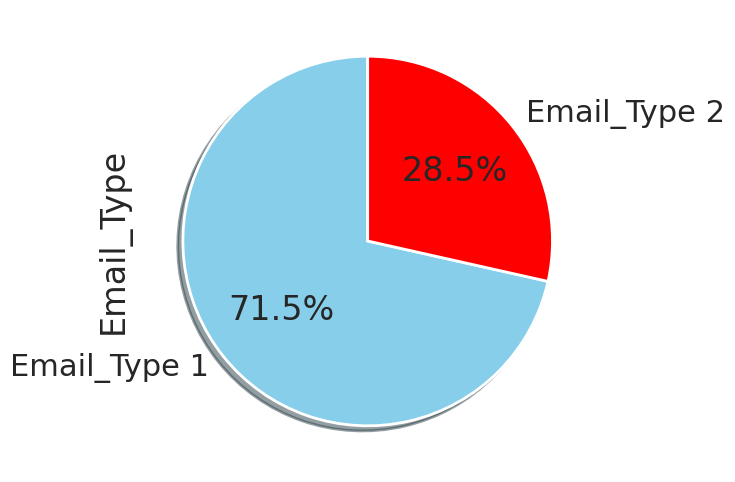

In [48]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Count plot helps in learning more about the count of indivdual categories.

Pie plot helps in understanding the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

Number of emails ignored is way more than emails that are acknowledged overall.

Overall 71% emails are of type 1, out of which 71% emails are ignored i.e., so only 29% of type 1 showed open rate.
Similarly 29% emails are of type 2, out of which 29% percent are ignored i.e., 71% of type 2 showed open rate.

Type 2 show more promising result even though sent in less volume, it show more emails were acknowledged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps in understanding how emails are being engaged, even though it helped but this graph was incapable to produce any business impact other than visualizing the curiosity of engagement.

#### Chart - 3 Engagement based on Email Type with all numerical features

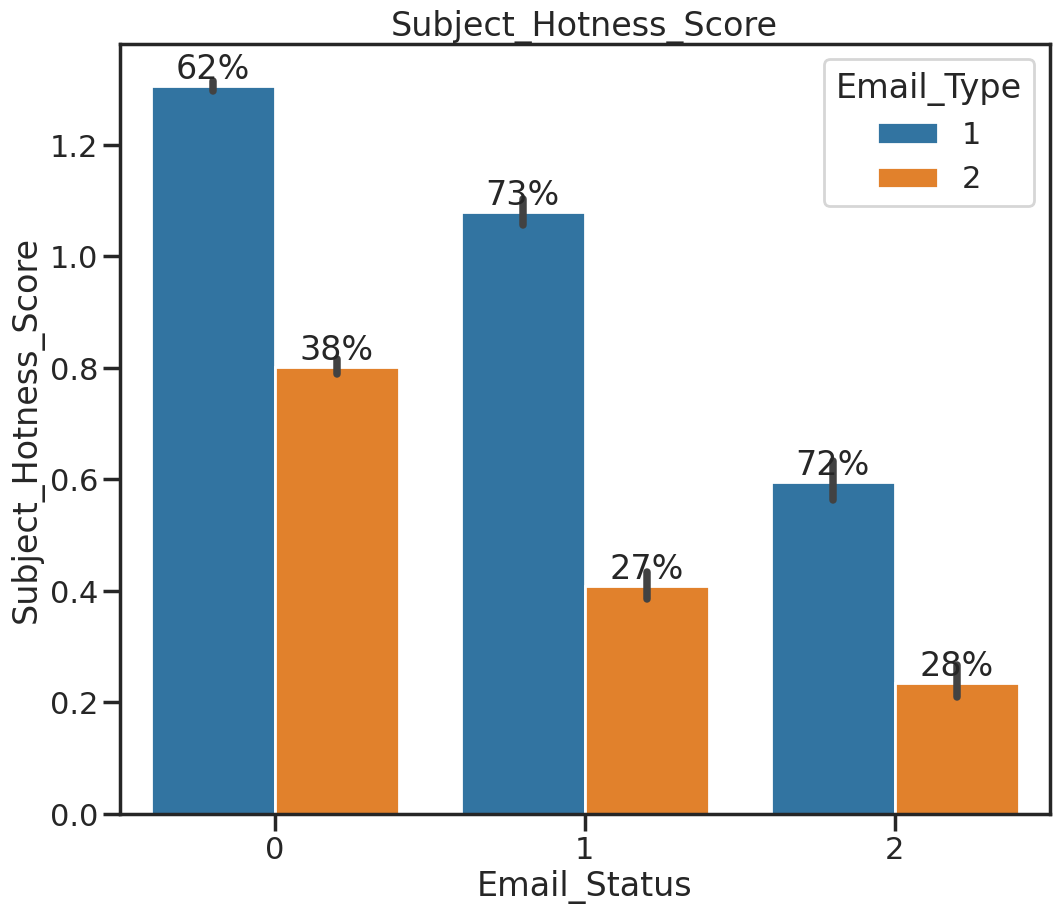

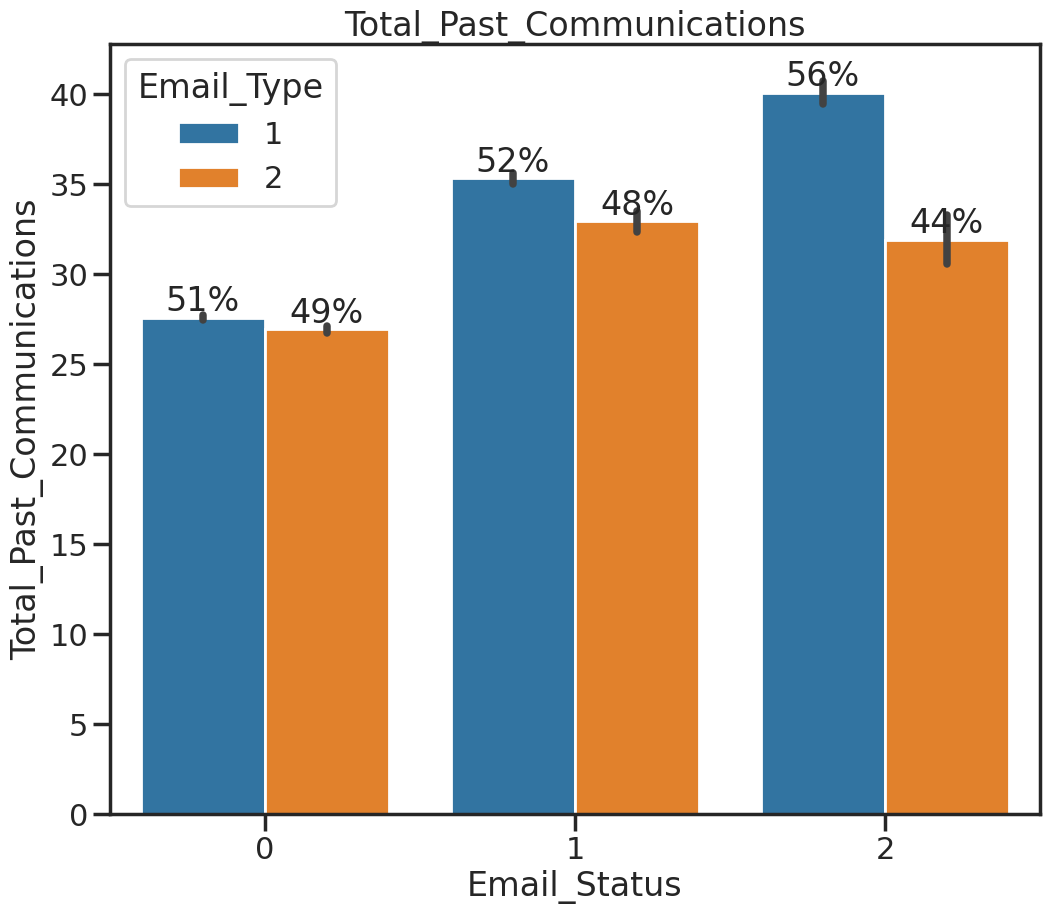

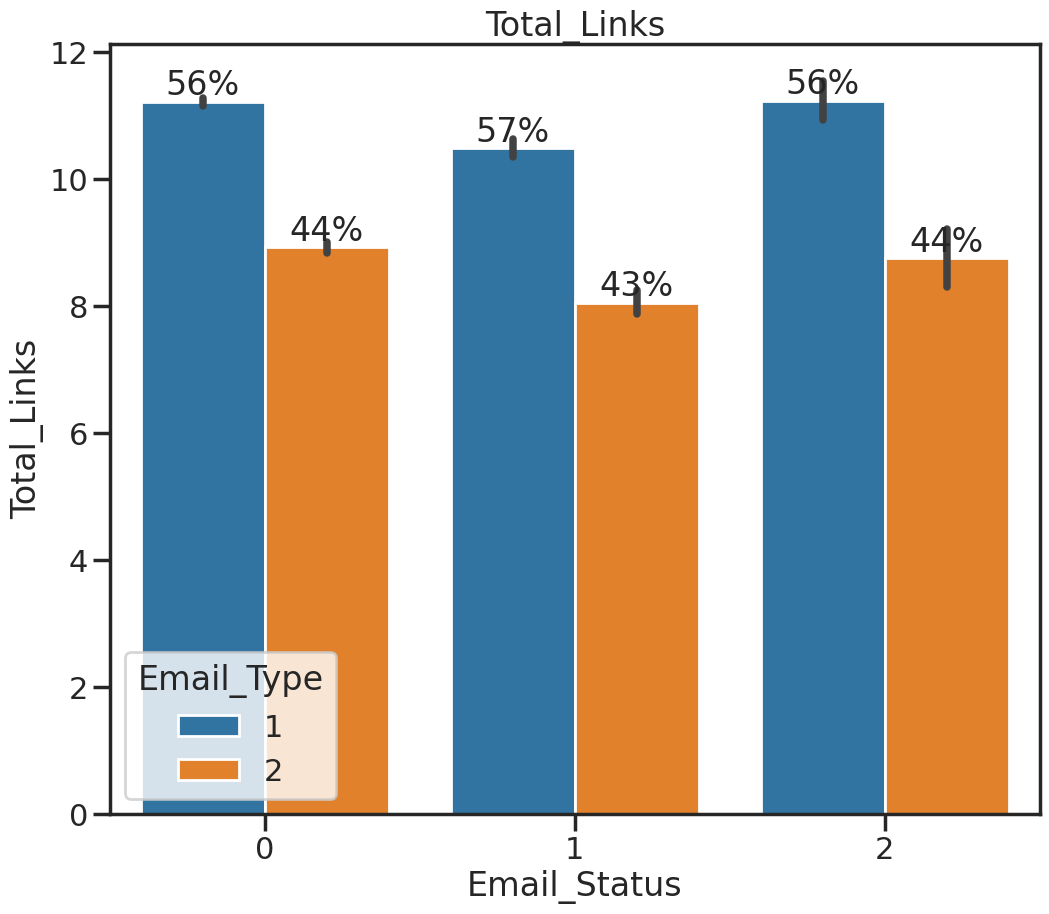

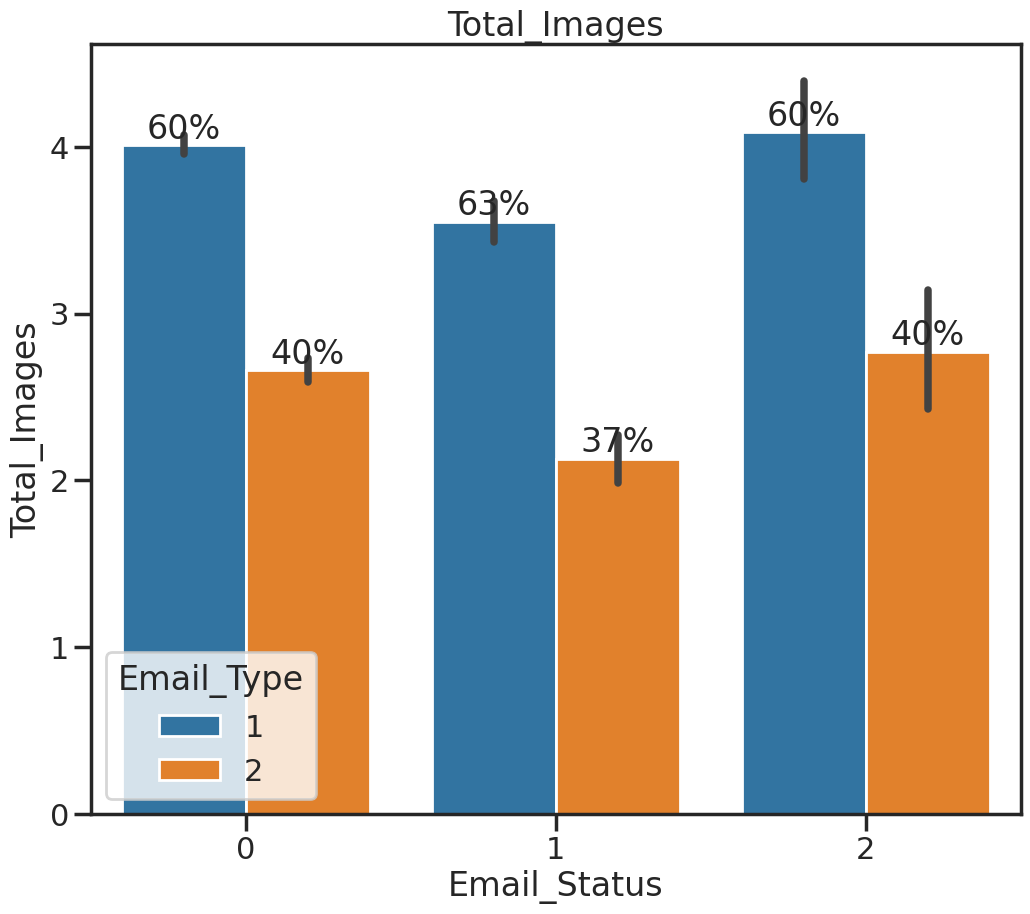

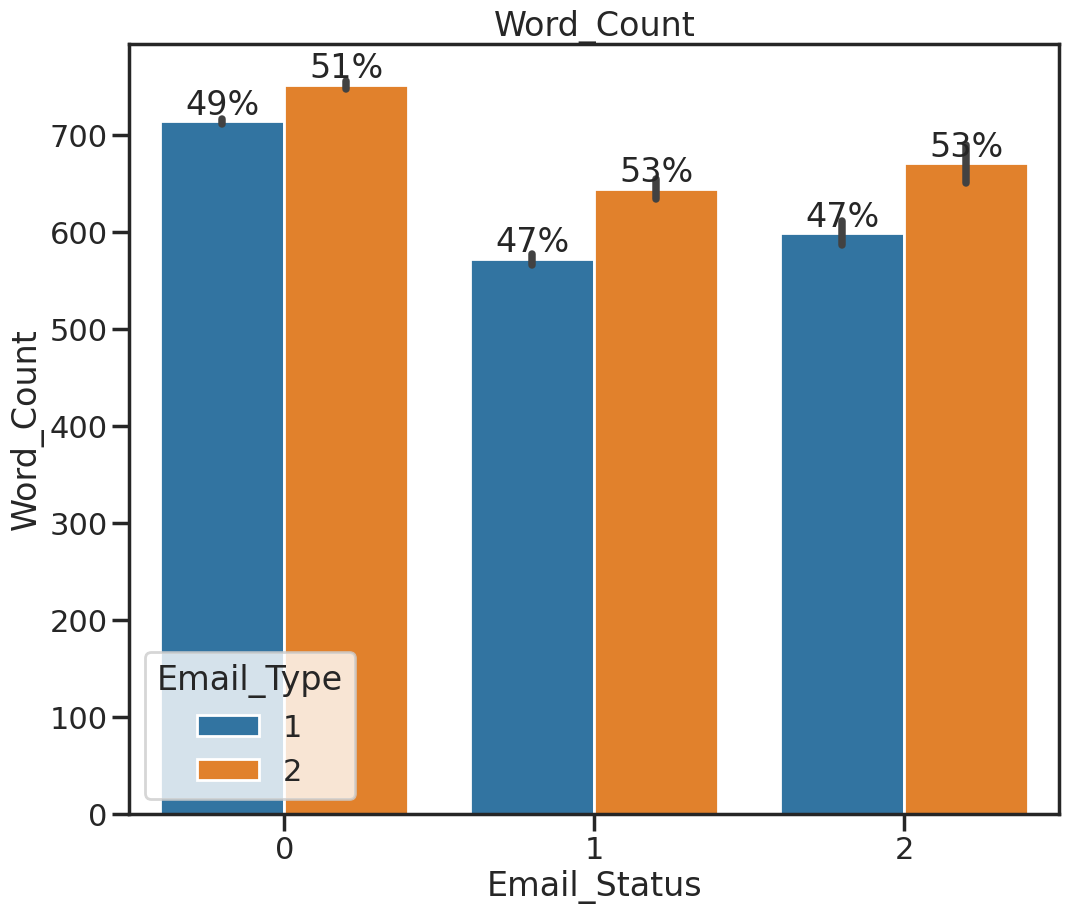

In [49]:
# Chart - 3 visualization code

for value in num_feature:
  plt.figure(figsize = (12,10))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Email_Type');
  unique = len([x for x in df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  # plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data.
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email type with respect to Email status, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

As from the previous chart, it was shown that even though email sent for type 1 was more and ignored rate was also high for the same i.e., type 2 being sent on less volume show good enagement rate.

From this present graph it is clear that past communication has to be more for better enagement alongwith average of word count 600 with subject hotness score of 0.6 and content having link of average 10 and 3 image gives good result.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing emails are generally more ignored than important notices, and communication is important therefore email which are sent should be where people can talk back instead of just sending it from no reply email id plus if emails are sent in the form of notices, it show more enagement.

Click through rate for marketing or conversion rate is low are marketing emails are ignored most of the time which may lead to negative growth if email marketing is the core for scaling of business or in generating revenue.

#### Chart - 4 Email Campaign Type

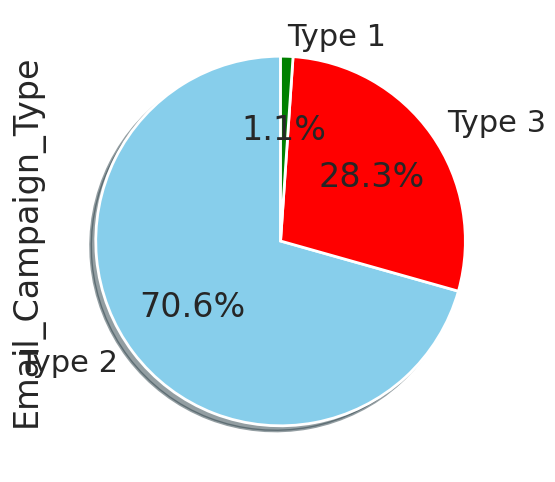

In [50]:
# Chart - 4 visualization code
#pie chart for distribution of each email campaign type
df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                               colors=['skyblue','red','green'],
                               explode=[0,0,0]
                              );

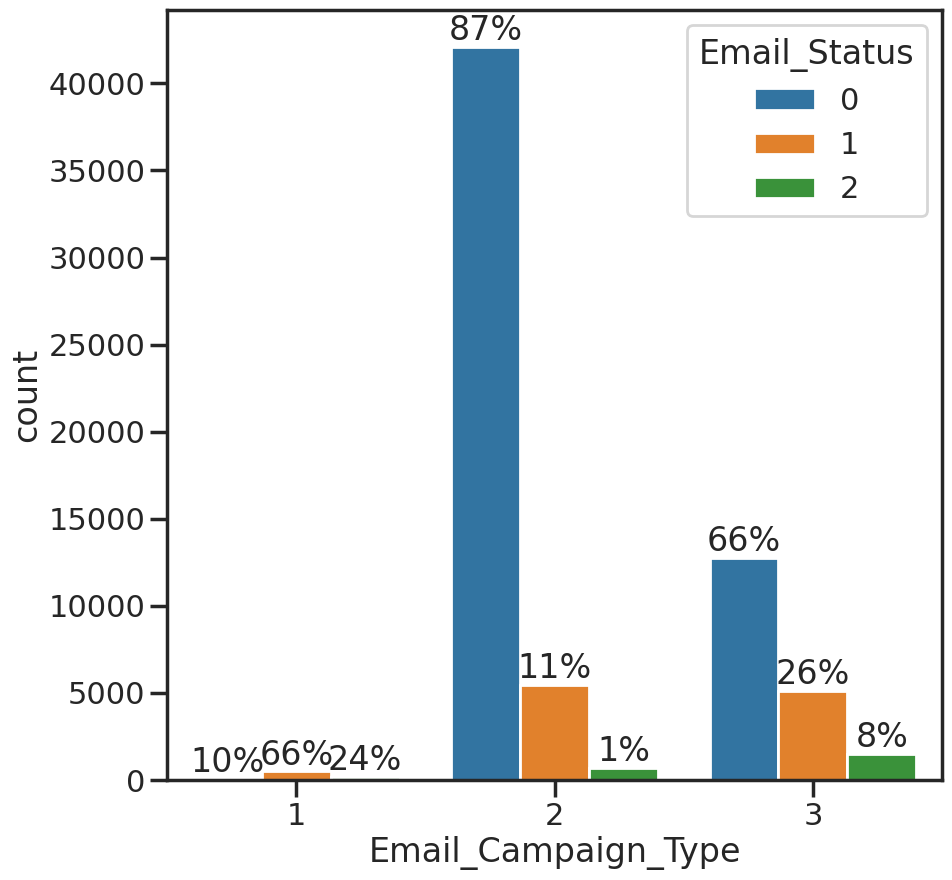

In [51]:
#bar plot for understanding how email status is affected by campign type
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'])
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart.

Pie chart show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Email campaign 1, even though has very small quantity but open rate for those email are way more than others.

Email campaign type 2 show most of the emails as ignored and only 1% of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and stop campaign 2 as its most of the emails are ignored.

If emails are ignored in huge number, its better to stop that category and make sure to use a/b test with the content and other category before sending in bulk as it will only cost loss of revenue.

#### Chart - 5 Location with most Email Acknowledged

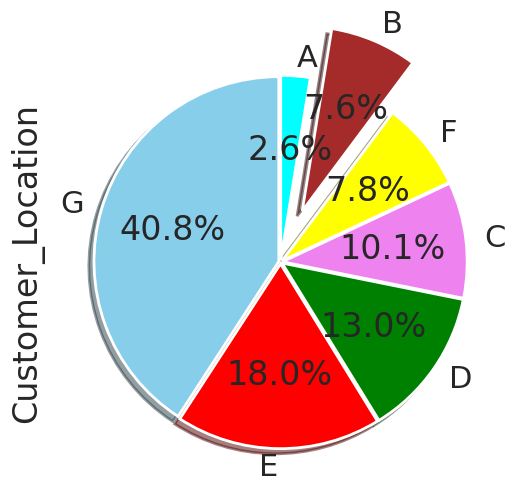

In [52]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['skyblue','red','green','violet','yellow','brown','cyan','magenta'],
                               explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01]
                              );


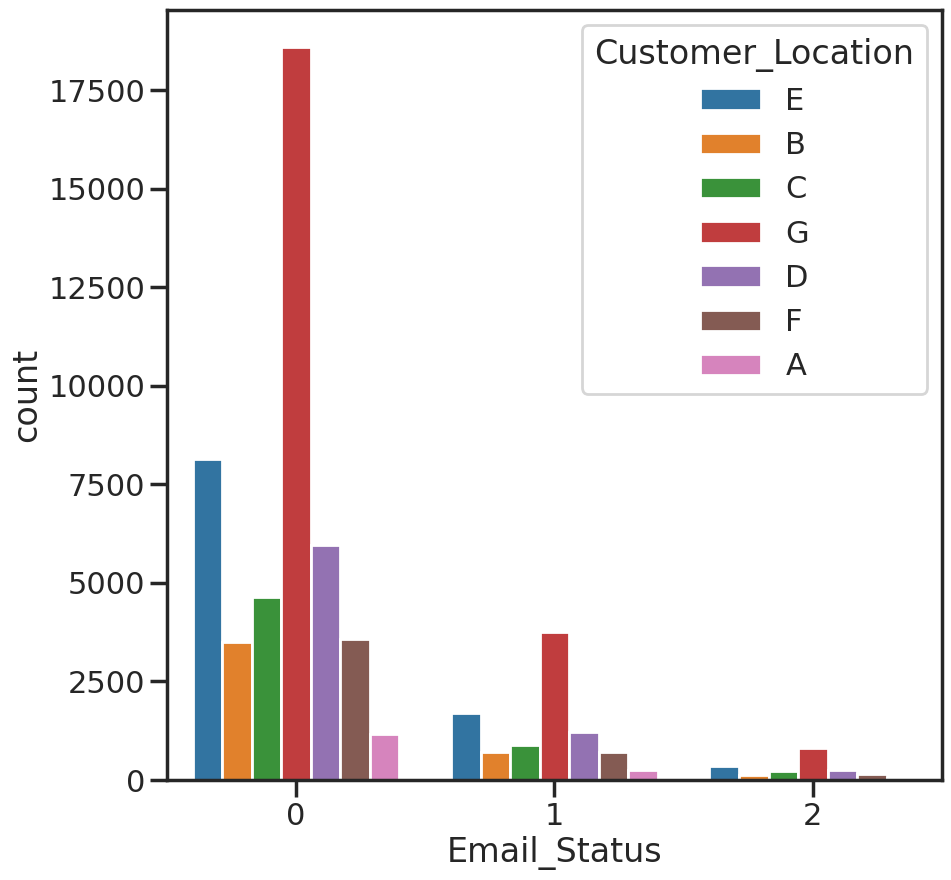

In [53]:
#based on location identifying how email status changed
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Customer_Location'])
plt.show()

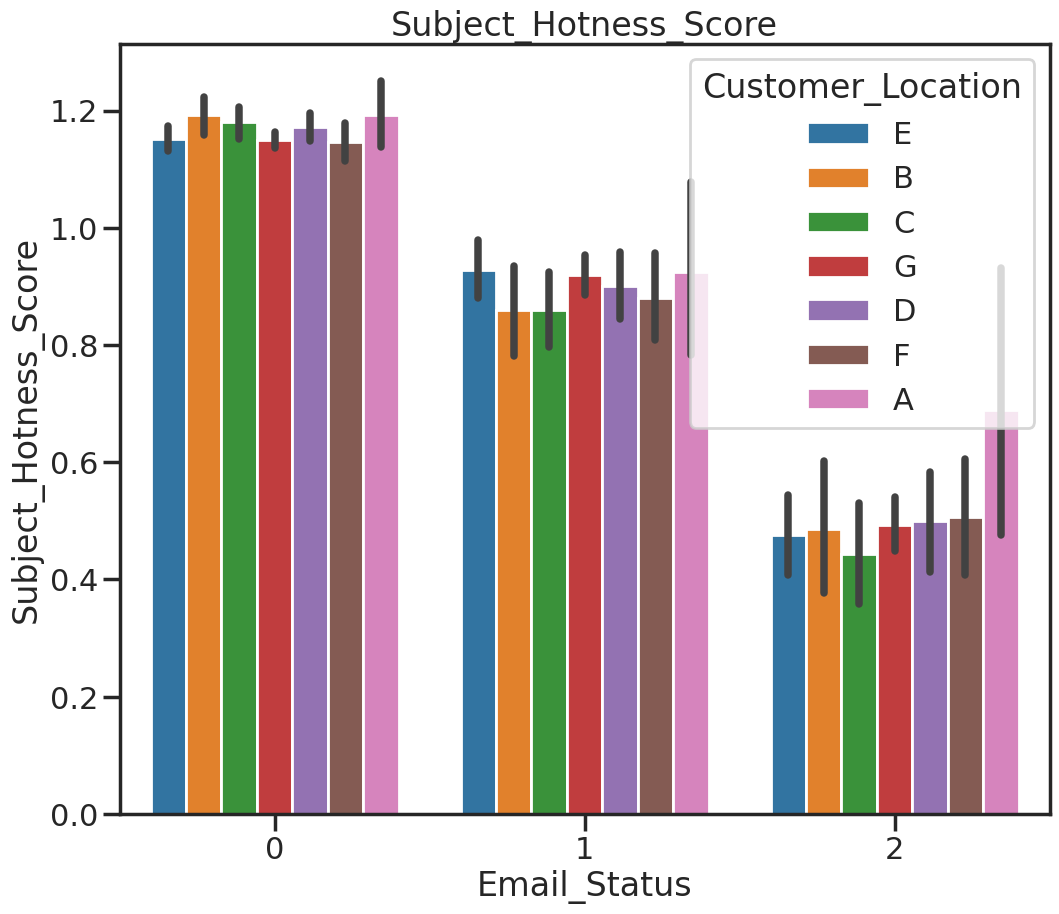

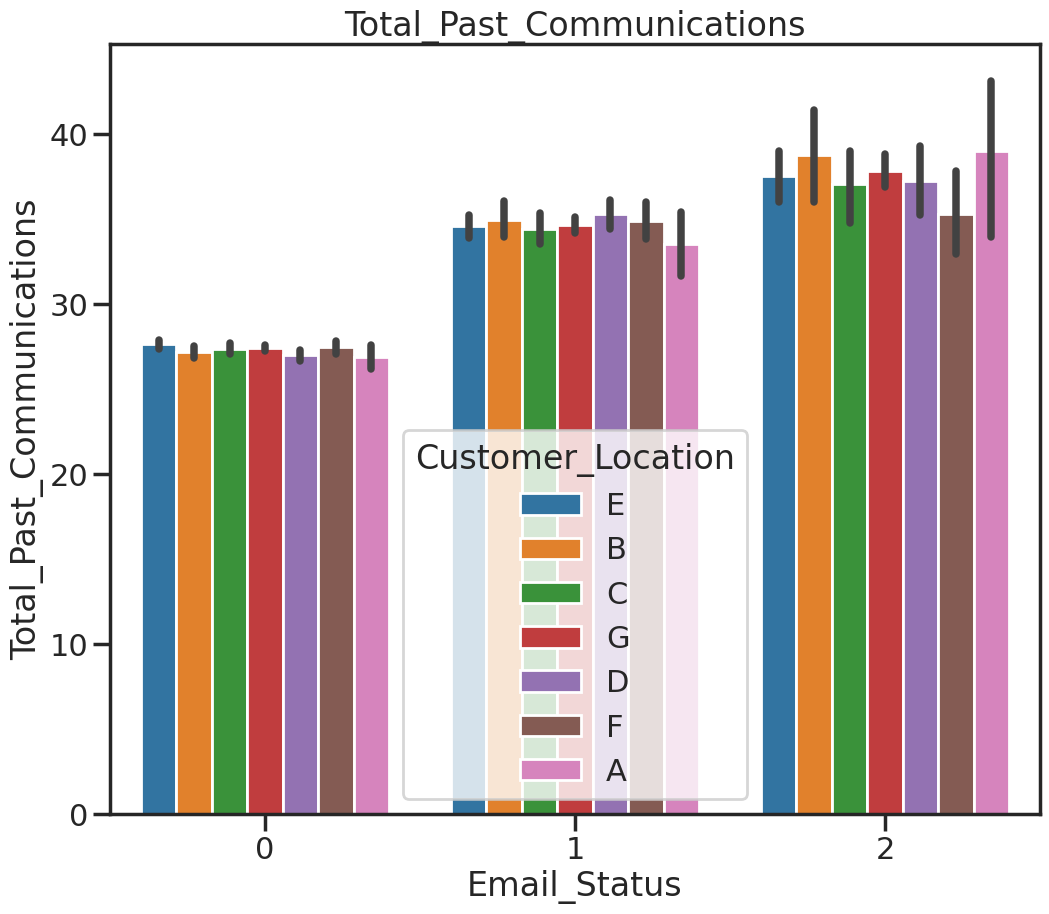

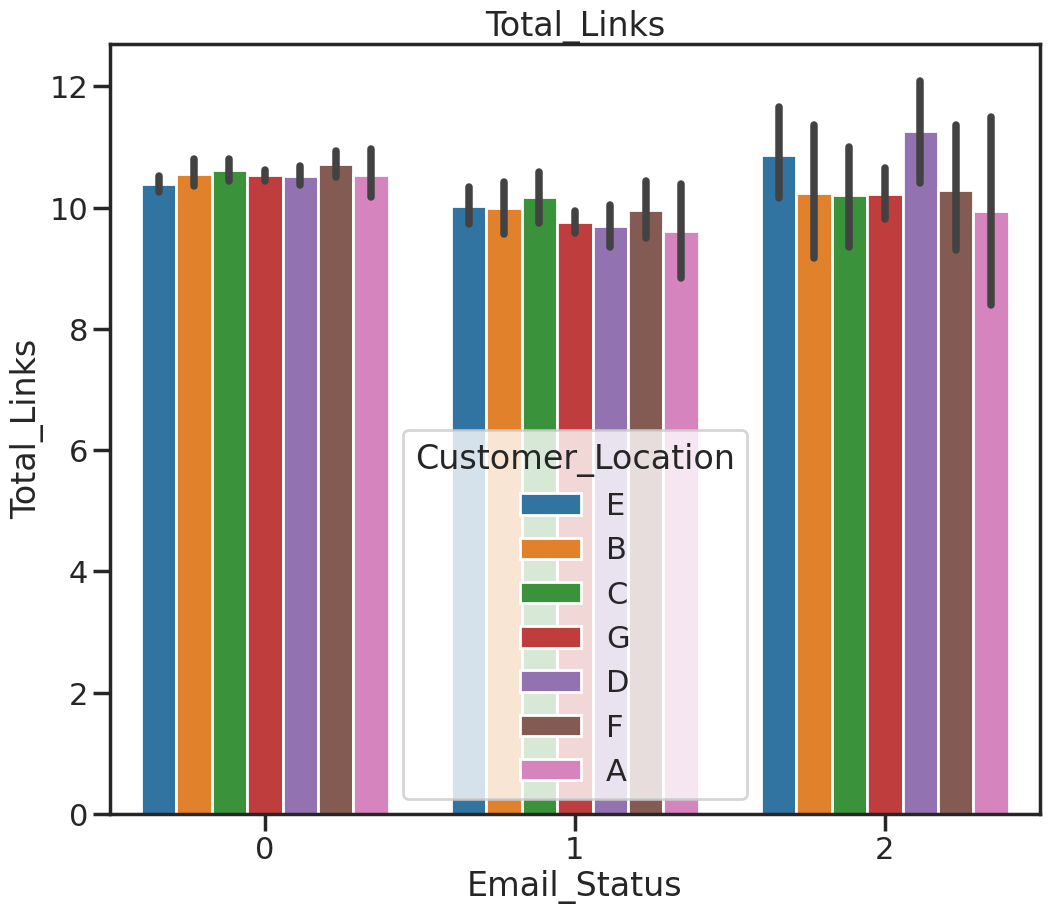

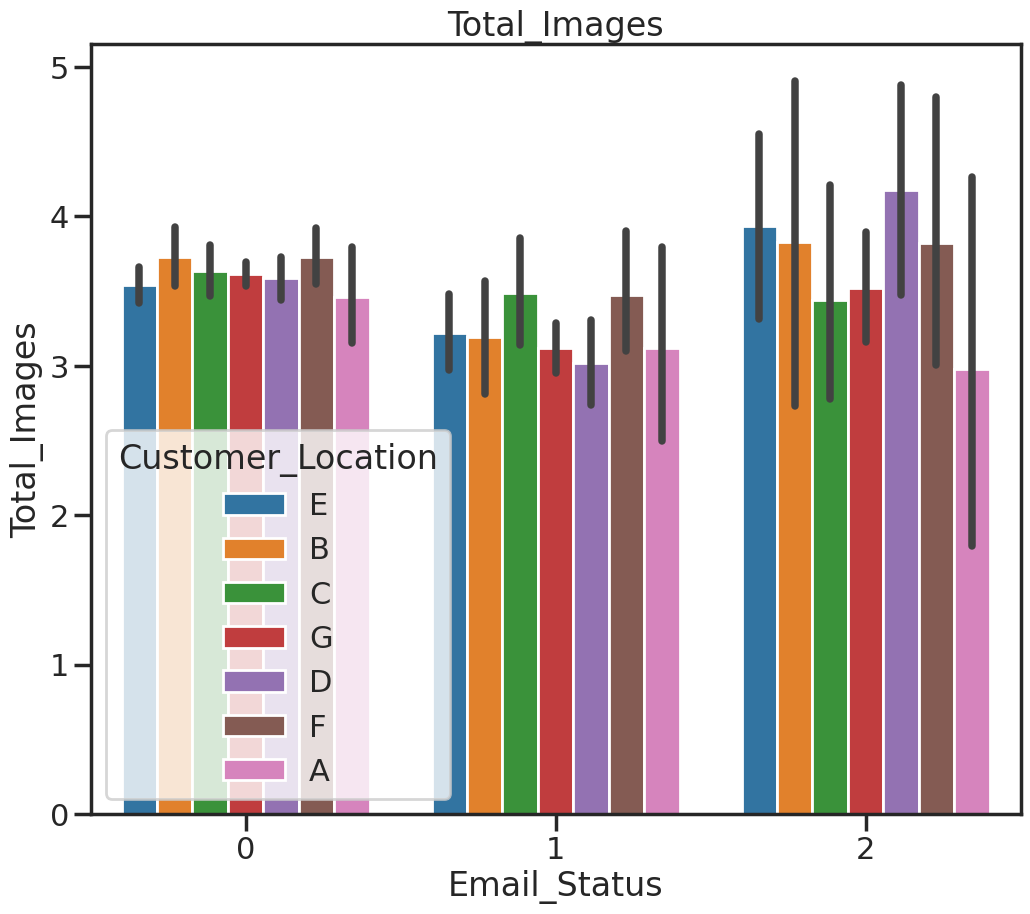

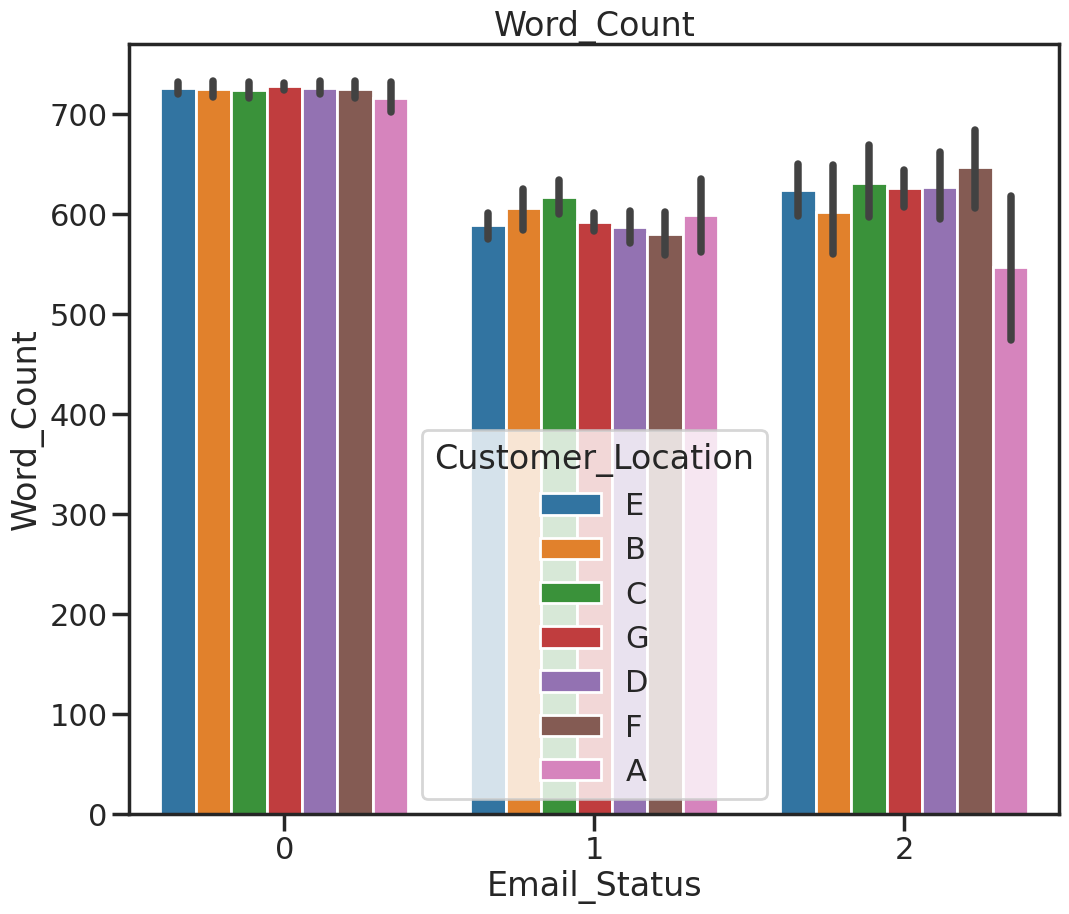

In [54]:
#checking effect of location on other numerical features
for value in num_feature:
  plt.figure(figsize = (12,10))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Customer_Location');
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Easy to understand and helpful in understanding the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

Location C show maximum number of enagement as very low number of email very sent to this location and for that also, it showed maximum number of communication and emails acknowledged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the location, email should be more sent for location C rather than on location G where most of the emails are ignored and very less emails are acknowledged.

May be customer location G had more potential but it coversion rate is lower which may cause extra loss of revenue.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The Email_Type of the campaign will not have any significant impact on the Email_Status.
* The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications.
* The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email.

### Hypothetical Statement - 1
---
The Email_Type of the campaign will not have any significant impact on the Email_Status


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used chi-square test of independence which is a statistical test to determine if there is a significant association between two categorical variables. In this case, the two variables are Email_Type and Email_Status.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are categorical and I want to determine if there is a relationship between them.

### Hypothetical Statement - 2

---
The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
* Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")
# perform non-parametric Spearman's rank correlation test
rho, p_value = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications
Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used Pearson's correlation test which measures the linear correlation between two continuous variables. In this case, the two variables are Subject_Hotness_Score and Total_Past_Communications.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are continuous and I want to determine if there is a linear relationship between them.

### Hypothetical Statement - 3
---
The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'],
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'],
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Images'],
                                  df[df['Customer_Location'] == 'B']['Total_Images'],
                                  df[df['Customer_Location'] == 'C']['Total_Images'],
                                  df[df['Customer_Location'] == 'D']['Total_Images'],
                                  df[df['Customer_Location'] == 'E']['Total_Images'],
                                  df[df['Customer_Location'] == 'F']['Total_Images'],
                                  df[df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


In [ ]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(df[df['Customer_Location'] == 'A']['Total_Links'],
                              df[df['Customer_Location'] == 'B']['Total_Links'],
                              df[df['Customer_Location'] == 'C']['Total_Links'],
                              df[df['Customer_Location'] == 'D']['Total_Links'],
                              df[df['Customer_Location'] == 'E']['Total_Links'],
                              df[df['Customer_Location'] == 'F']['Total_Links'],
                              df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used ANOVA (Analysis of Variance) test because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

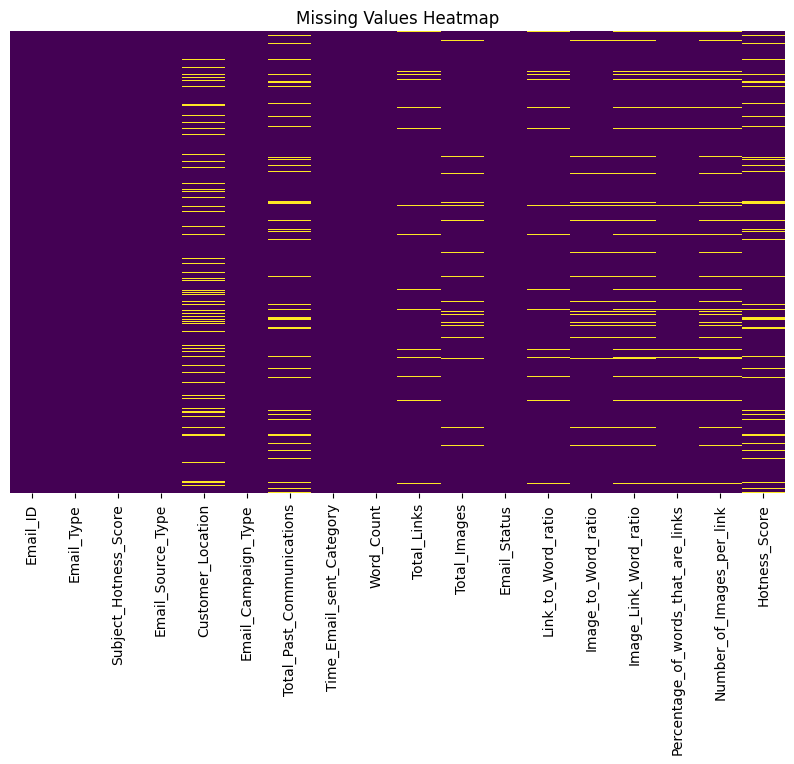

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
#getting missing value count using the funciton created earlier
missingVal

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45


*   Since that customer location is a categorical value, and it is not possible to identify the missing values, the most suitable approach for imputation is to replace the null values with the mode, as the mode represents the most frequently occurring category and is considered a robust choice for handling missing values in categorical data.

In [ ]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

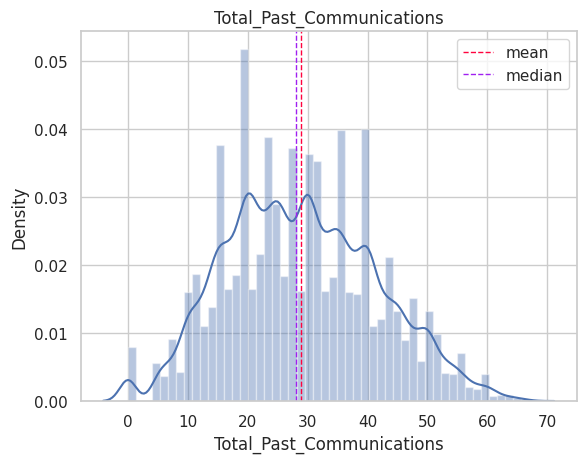

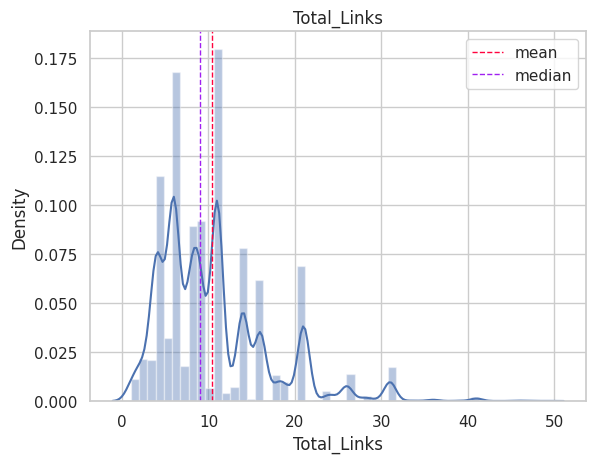

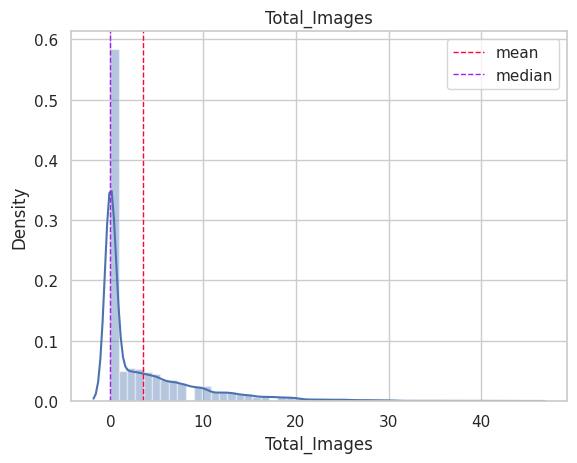

In [ ]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df[cat], hist= True);
  feature = df[cat]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)


*   Since only 'Total_Past_Communications' exhibits an almost
normal distribution, while the other two, 'Total_Links' and 'Total_Images,' show right skewness, it is appropriate to use the mean for 'Total_Past_Communications' and the median for the other two, as the median is more robust to outliers.

In [ ]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                                 0
Email_Type                               0
Subject_Hotness_Score                    0
Email_Source_Type                        0
Customer_Location                        0
Email_Campaign_Type                      0
Total_Past_Communications                0
Time_Email_sent_Category                 0
Word_Count                               0
Total_Links                              0
Total_Images                             0
Email_Status                             0
Link_to_Word_ratio                    2201
Image_to_Word_ratio                   1677
Image_Link_Word_ratio                 3810
Percentage_of_words_that_are_links    2201
Number_of_Images_per_link             3810
Hotness_Score                         6825
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing value imputation techniques involve replacing null values using the central limit theorem, ensuring that the sampling distribution of the mean is normally distributed, given a sufficiently large sample size.

Since 'location' was categorical data, it was crucial to employ the mode imputation technique. This is because there was no feasible way to precisely determine the values for those locations. With almost 20% null values, deleting entries could result in significant data loss; hence, I opted to replace the null values using the mode.

For 'Total_Past_Communication,' which exhibited a normal distribution, I replaced its null values using the mean. As for the other two features, which were continuous data and demonstrated right skewness, there were two options for replacement: mode or median. The median is the preferred approach for right-skewed data, being less affected by outliers. Therefore, I chose the median to replace the null values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments in numerical feature
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Links', 'Total_Images', 'Word_Count']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

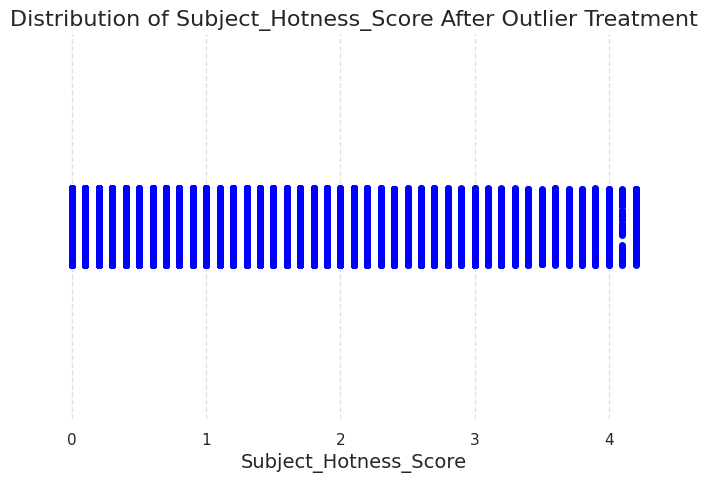

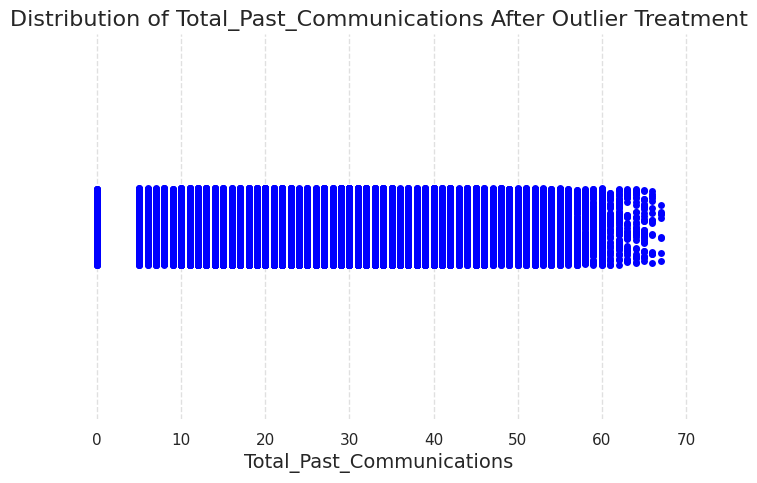

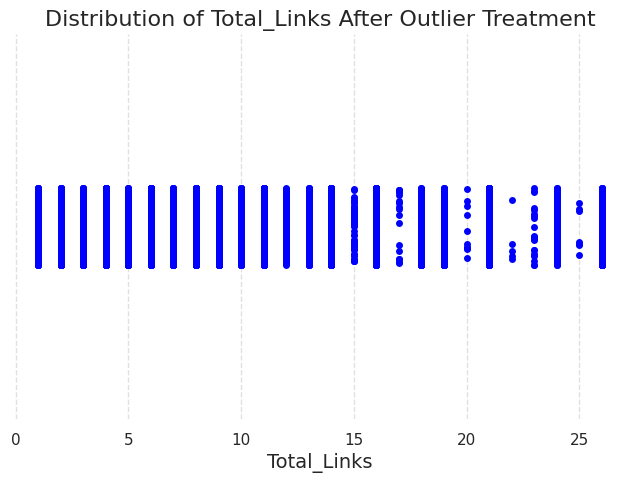

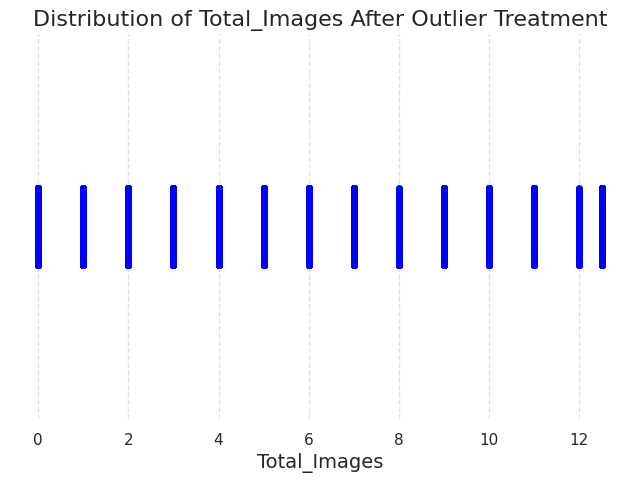

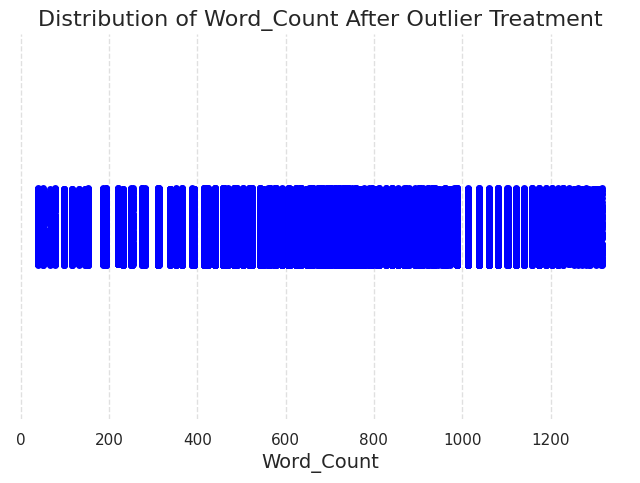

In [ ]:
# After Outlier Treatment, showing the dataset distribution using a strip plot
# Visualizing code for the numerical columns
for col in num_feature:
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plotting the strip plot
    sns.stripplot(x=df[col], color='blue', ax=ax)

    # Adding labels and title
    ax.set_title(f'Distribution of {col} After Outlier Treatment', fontsize=16)
    ax.set_xlabel(col, fontsize=14)

    # Adjusting plot aesthetics
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)

    plt.show()
    print('=' * 120)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I choose to handle outliers in numerical values by first categorizing them into symmetric and non-symmetric. Since there were no symmetric data available, I chose to use capping techniques, setting the upper and lower limits to the maximum and minimum values, respectively, instead of simply removing them.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Creating a separate copy for categorical features
cat_feature_encoding = cat_feature.copy()

# Removing 'Email_ID' if it exists in the list
if 'Email_ID' in cat_feature_encoding:
    cat_feature_encoding.remove('Email_ID')

# Removing 'Email_Status' if it exists in the list
if 'Email_Status' in cat_feature_encoding:
    cat_feature_encoding.remove('Email_Status')


In [ ]:
# checking integer values of feature represent an ordinal relationship
from scipy.stats import chi2_contingency

# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(cat)
  # check the p-value
  if p < 0.05:
      print("There is a significant association between the categorical feature and the target variable")
  else:
      print("There is no significant association between the categorical feature and the target variable")
  print('\n')


Email_Type
There is a significant association between the categorical feature and the target variable


Email_Source_Type
There is a significant association between the categorical feature and the target variable


Customer_Location
There is no significant association between the categorical feature and the target variable


Email_Campaign_Type
There is a significant association between the categorical feature and the target variable


Time_Email_sent_Category
There is no significant association between the categorical feature and the target variable




Since 'location' does not exhibit any ordinal relationship, it is best to employ the one-hot encoding technique over other binary, count, target, and ordinal encoding methods. Despite using one-hot encoding on 'location,' there is a possibility of it causing a decline in model performance. Therefore, the decision to keep or remove the column will be made after conducting trials.

In [ ]:
#creating copy
df1 = df.copy()
# Encode your categorical columns
df1 = pd.get_dummies(df1,columns= ['Time_Email_sent_Category','Customer_Location',
                                   'Email_Campaign_Type'], drop_first = True)
df1.head(1)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Link_to_Word_ratio,...,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_2,Email_Campaign_Type_3
0,EMA00081000034500,1,2.20,2,33.00,440.00,8.00,0.00,0,0.02,...,0,0,0,0,0,1,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I have used one hot encoding technique on categorial feature customer location and time email sent category since it does not show any ordinal relation and rest other categorial features already had integer values which show ordinal relation.

Benefit of using one hot encoding:
* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***